# Домашнее задание 2 (Серякова Василиса ИАД_5). 

Продолжаем знакомиться с библиотекой `tensorflow`.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

C:\Users\hp\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Задание 1 -- tensorflow vs numpy (3 балла).

Сравните скорость работы функций над массивами в фреймворках tensorflow и numpy. Для этого реализуйте на нампае и тф'е следующее:

 * Сумму квадратов диагональных элементов квадратной матрицы. Например для матрицы
$$
 \begin{pmatrix}
     1& 0& 5\\
     -2& 8& 12\\
     4& 1& -5
 \end{pmatrix}
$$
 такая сумма будет равна $1^2 + 8^2 + (-5)^2 = 90$.
 * Угол между векторами в n-мерном пространстве. Напомним, что он вычисляется по формуле
 $$
     \arccos \cfrac{\left\langle x, y\right\rangle}{||x||\cdot ||y||}
 $$

 * Сумму элементов коммутатора квадратных матриц $A$ и $B$. Коммутатор матриц это матрица $C = AB - BA$.
 
Постройте графики зависимости времени выполнения операций от размера массивов (в логарифмическй шкале) для каждой задачи для tensorflow и numpy (три рисунка, по два графика на рисунок). Элементы матриц выбирайте случайным образом (через модуль tf.random и np.random соотвтетственно). Какой фреймворк оказывается быстрее? Как Вы думаете, почему?

Можете пользоваться образцом кода ниже.

**Замечание**. Графики должны быть опрятными! Подписывайте оси и единицы измерения, указывайте легенду. За неопрятные графики оценка за задание может быть снижена.

**Подсказка**. Функция time.time() возвращает время в секундах (с высокой точностью), прошедшее от 00:00 1 января 1970 года. Используйте её, чтобы посчитать, сколько длилось выполнение куска кода. Также вам могут пригодиться функции `tf.linalg.norm`, `tf.diag_part`, `tf.acos`, `tf.matmul`

In [2]:
def visualize(size,t_tensorflow, t_numpy):
    
    size = [i for i in size]
    plt.figure(figsize = [10,4])

    plt.plot(size, t_tensorflow, c="b", label ='Tensorflow')
    plt.plot(size, t_numpy, c="g", label = 'Numpy')
    plt.title("Tensorflow VS Numpy")
    plt.xlabel("размер маccива")
    plt.ylabel("время выполнения, c")
    plt.legend(loc = 'lower right')


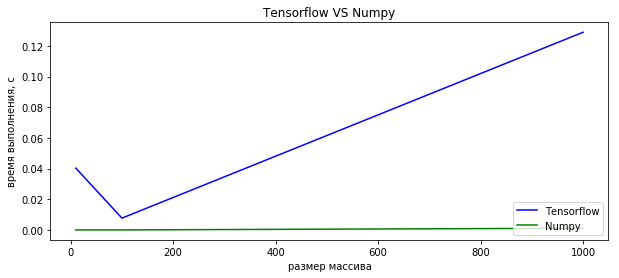

In [3]:
import time

sess = tf.Session()
t_tensorflow = []
t_numpy = []
size = [10, 100, 1000]

for n in size:
    
    x = tf.constant(np.random.sample(n**2), shape = [n,n])
    y = tf.reduce_sum(tf.diag_part(x)**2)
    
    begin = time.time()
    sess.run(y)
    end = time.time()
    time_spent = end - begin
    t_tensorflow.append(time_spent)
    
    # The same but for numpy
    a = np.array(np.random.sample((n,n)))
    begin = time.time()
    res = np.sum(a.diagonal()**2)
    t_numpy.append(time.time()- begin)
    
sess.close()
visualize(size, t_tensorflow, t_numpy)

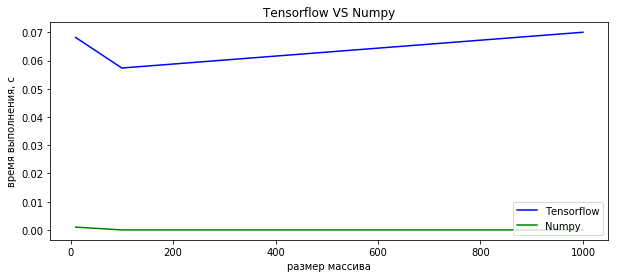

In [4]:
sess = tf.Session()
t_tensorflow = []
t_numpy = []
size = [10,100,1000]

for n in size:
    
    x = tf.constant(np.random.sample(n))
    y = tf.constant(np.random.sample(n))
    mid_res = tf.reduce_sum(tf.multiply(x, y)) # <x,y>
    mid_res_ = tf.multiply(tf.linalg.norm(x),tf.linalg.norm(y)) #|x|*|y|
    res = tf.acos( tf.truediv(mid_res, mid_res_))
    
    begin = time.time()
    sess.run(res)
    t_tensorflow.append(time.time()-begin)
    
    # The same but for numpy
    a = np.array(np.random.sample(n))
    b = np.array(np.random.sample(n))
    begin = time.time()
    res = np.arccos(np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b)) )
    t_numpy.append(time.time() - begin)

    
sess.close()
visualize(size, t_tensorflow, t_numpy)

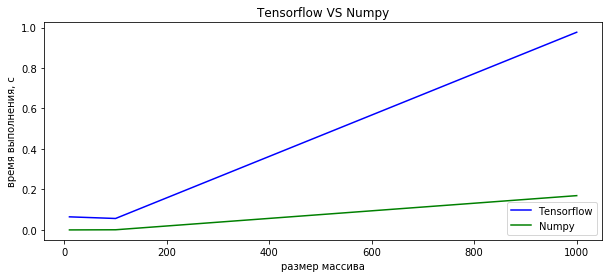

In [5]:
sess = tf.Session()
t_tensorflow = []
t_numpy = []
size = [10,100,1000]
#c=ab-ba
for n in size:
    
    x = tf.constant(np.random.sample(n**2), shape = [n,n])
    y = tf.constant(np.random.sample(n**2), shape =[n,n])
    
    mid_res = tf.matmul(x, y)-tf.matmul(y, x)
    res = tf.reduce_sum(mid_res)
    
    begin = time.time()
    sess.run(res)
    t_tensorflow.append(time.time()- begin)
    
    # The same but for numpy
    a = np.array(np.random.sample((n,n)))
    b = np.array(np.random.sample((n,n)))
    begin = time.time()
    res = np.sum(np.dot(a,b) - np.dot(b,a))
    t_numpy.append(time.time() - begin)

sess.close()
visualize(size, t_tensorflow, t_numpy)

Numpy работает гораздо быстрее (иногда время выполнения настолько маленькое, что уходит в 0.0).
Tensorflow медленнее из-за необходимости 'прохождения' всех ребер построенного графов, которые соответствуют операциям

## Задание 2 -- градиенты и оптимайзеры (3 балла).

Продолжим работать с датасетом MNIST с размером картинок 8х8.

In [6]:
from sklearn.datasets import load_digits
mnist = load_digits()
X, y = mnist.data, mnist.target
n_labels = len(np.unique(y))

Многие алгоритмы оптимизации имплементированы в `tensorflow`. В этом задании мы сравним их при одинаковых параметрах, а также переберём разные параметры для одного алгоритма.

**Задание 2.1** (1.5 балла). Исследуйте вклад параметра momentum в методe `tf.train.MomentumOptimizer`. Для этого для разных значений momentum постройте графики значения функции потерь от номера итерации. При каких значениях momentum алгоритм сходится быстрее? Используйте `learning_rate=0.01`.

**Замечание**. В этом задании используется многоклассовая логистическая регрессия. Не меняйте код модели в ячейке ниже.

In [7]:
tf.reset_default_graph()

w = tf.Variable(np.ones((X.shape[1], n_labels)), dtype="float32")
X_input = tf.placeholder("float32", (None, X.shape[1]))
y_input = tf.placeholder("int32", (None,))

predicted = tf.nn.softmax(X_input@w)
loss = tf.losses.log_loss(tf.one_hot(y_input, depth = n_labels), predicted)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [8]:
def train(X, y, train_op, batch_size=16):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X) // batch_size
        for epoch in range(1):
            loss_history = []
            for b in range(n_batch_train):
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history.append(loss_)
    return loss_history

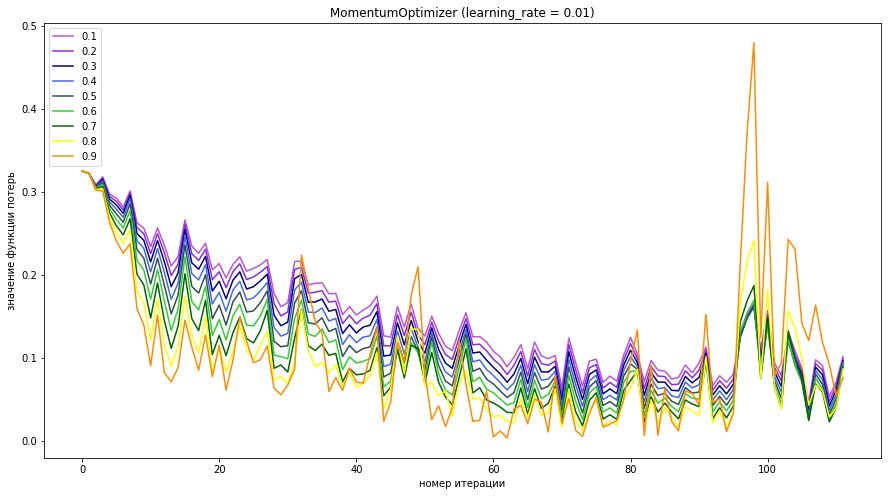

In [9]:
m = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
big_l_h = []
for momentum_value in m:
    train_op = tf.train.MomentumOptimizer(0.01, momentum_value).minimize(loss)
    l_h = train(X, y, train_op) #return loss_history
    big_l_h.append(l_h)

clr = ['mediumorchid', 'blueviolet', 'navy', 'royalblue', 
       'darkslategrey', 'limegreen', 'darkgreen', 'yellow', 'darkorange'] 

plt.figure(figsize = [15,8])
for i in range(9):
    plt.plot(np.arange(len(l_h)), big_l_h[i], c=clr[i], label = m[i])
plt.title("MomentumOptimizer (learning_rate = 0.01)")
plt.xlabel("номер итерации")
plt.ylabel("значение функции потерь")
plt.legend(loc = 'upper left')

In [10]:
for i in range (len(m)):
    print(np.mean(big_l_h[i]))

0.15082131
0.14321075
0.13515939
0.12667052
0.11775762
0.10842805
0.09891234
0.09203504
0.103204176


Ваш ответ: **momentum = 0.6** для метода MomentumOptimizer (learning_rate = 0.01). Среднее значение ошибки меньше при  momentum = {0.7, 0.8, 0.9}, но и разброс значений функции потерь больше. Поэтому выберем следующее по величине значение средней ошибки, ему соответствует momentum = 0.6 (заметим, и разброс значений функции ошибки меньше)

**Задание 2.2** (0.5 баллa). Исследуйте вклад `learning_rate`. Для этого для разных значений `learning_rate` постройте графики значения функции потерь от номера итерации. При каких значениях длины шага градиентного спуска алгоритм сходится быстрее? Используйте метод MomentumOptimizer с параметром, который вы считаете лучшим по итогам предыдущего задания.

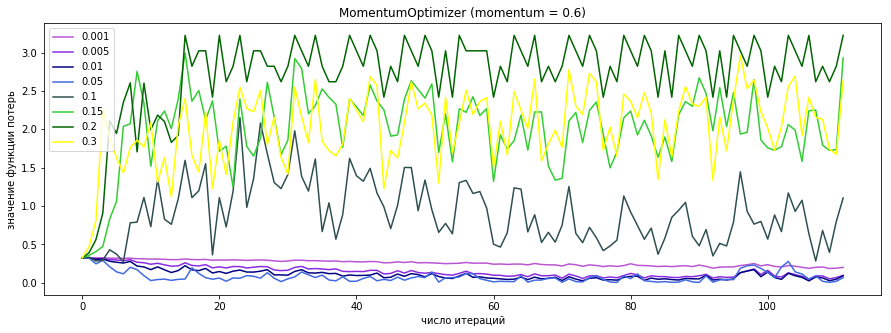

In [11]:
learning_rate = [0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3]
big_l_h = []
for param in learning_rate:
    train_op = tf.train.MomentumOptimizer(learning_rate = param, momentum = 0.6).minimize(loss)
    loss_history = train(X, y, train_op)
    big_l_h.append(loss_history)
    
plt.figure(figsize = [15,5])
plt.title ('MomentumOptimizer (momentum = 0.6)')
plt.xlabel('число итераций')
plt.ylabel('значение функции потерь')
for i in range(len(learning_rate)):
    plt.plot(range(len(loss_history)), big_l_h[i], c= clr[i], label = learning_rate[i])
plt.legend(loc='upper left')


In [12]:
for i in range (len(learning_rate)):
    print(np.mean(big_l_h[i]))

0.25622723
0.14578894
0.10842805
0.07682009
0.91287464
2.0204384
2.7374094
2.0237257


Ваш ответ: **learning_rate = 0.01** для метода MomentumOptimizer(momentum = 0.6). Хотя среднее значение ошибки меньше при  learning_rate = 0.05, но при таком learning_rate разброс значений ошибки больше. Поэтому выберем следующее по величине значение средней ошибки, ему соответствует learning_rate = 0.01 (заметим, и разброс значений функции ошибки меньше)

**Задание 2.3** (0.5 балла) Проделайте то же, что и в пункте выше, но используйте в качестве базового алгоритма оптимизации `Adam` с дефолтными параметрами.

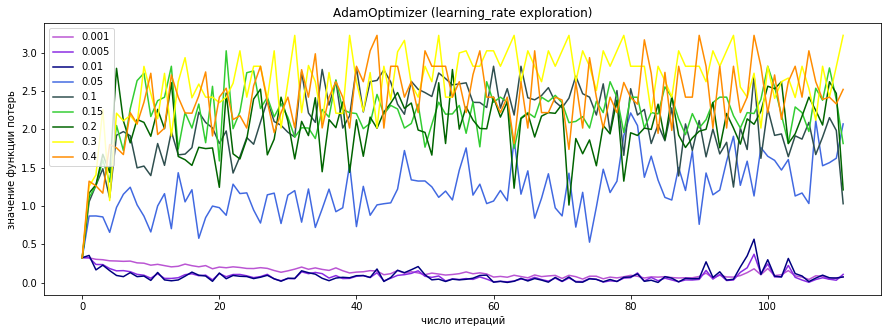

In [13]:
#Исследуем learning_rate в AdamOptimizer(beta_1=0.9, beta_2=0.999, epsilon=1e-07б, learning_rate = ?)

learning_rate = [0.001, 0.005, 0.01, 0.05,  0.1, 0.15, 0.2, 0.3, 0.4]
big_l_h = []

for param in learning_rate:
    train_op = tf.train.AdamOptimizer(learning_rate = param).minimize(loss)
    loss_history = train(X, y, train_op)
    big_l_h.append(loss_history)
    
plt.figure(figsize = [15,5])
plt.title ('AdamOptimizer (learning_rate exploration)')
plt.xlabel('число итераций')
plt.ylabel('значение функции потерь')

for i in range(len(learning_rate)):
    plt.plot(range(len(loss_history)), big_l_h[i], c= clr[i], label = learning_rate[i])
    
plt.legend(loc='upper left')

In [14]:
for i in range (len(learning_rate)):
    print(np.mean(big_l_h[i]))

0.137396
0.08228614
0.087791875
1.2039223
2.0855534
2.1915944
1.9995548
2.6140835
2.3955343


Ваш ответ: **learning_rate = 0.001** для метода AdamOptimizer. По сравнению со значениями learning_rate = {0.005, 0.01}, среднее значение ошибки больше на 0.05, но меньше разброс значений и лучше сходимость

**Задание 2.4** (0.5 балла) Сравните алгоритмы `Adam` и `Momentum` для данной задачи. Какой показывает себя лучше?

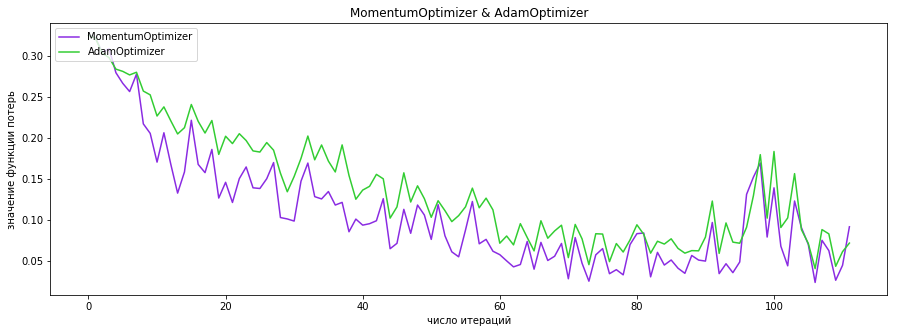

In [15]:
train_op_MO = tf.train.MomentumOptimizer(learning_rate = 0.01, momentum = 0.6).minimize(loss)
l_h_MO = train(X, y, train_op_MO)
train_op_AO = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss)
l_h_AO = train(X, y, train_op_AO)

plt.figure(figsize = [15,5])
plt.title ('MomentumOptimizer & AdamOptimizer')
plt.xlabel('число итераций')
plt.ylabel('значение функции потерь')
plt.plot(range(len(l_h_MO)), l_h_MO, c = clr[1], label = 'MomentumOptimizer')
plt.plot(range(len(l_h_MO)), l_h_AO, c = clr[5], label = 'AdamOptimizer')
plt.legend(loc= 'upper left')

In [16]:
print("Среднее значение ошибки MomentumOptimizer = ", np.mean(l_h_MO))
print("Среднее значение ошибки AdamOptimizer = ", np.mean(l_h_AO))

Среднее значение ошибки MomentumOptimizer =  0.10842805
Среднее значение ошибки AdamOptimizer =  0.137396


Ваш ответ: При найденных параметрах и установленных размерах batch метод MomentumOptimizer(learning_rate= 0.01, momentum = 0.6) работает лучше, чем AdamOptimizer(learning_rate = 0.05): средняя ошибка функции потерь меньше и график сходится быстрее

## Задание 3 -- наша первая нейросеть, часть 2 (4 балла).

В этом задании мы напишем нейросеть для работы с датасетом MNIST размера 28х28. Исользовать можно только полносвязные (dense) слои! Для этого мы "вытянем" картинки 28х28 в длинный вектор размера 784.

In [17]:
from mnist import load_dataset

X_train, y_train, X_test, y_test, _, _ = load_dataset()

X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)

In [18]:
n_labels = len(np.unique(y_train))

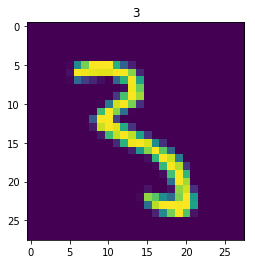

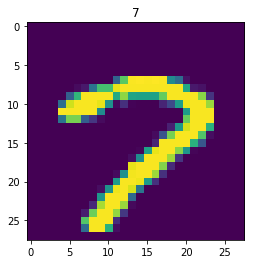

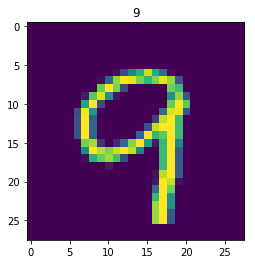

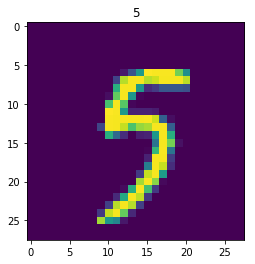

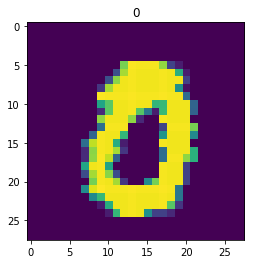

In [19]:
for i in [228, 1437, 322, 420, 69]:
    plt.title(y_train[i])
    plt.imshow(X_train[i].reshape((28, 28)))
    plt.show()

Подберите архитектуру и алгоритм оптимизации так, чтобы значение accuracy на тестовой выборке было не менее 97.5.

In [20]:
def weight(name,shape):
    d = tf.truncated_normal_initializer(stddev=0.01)
    return tf.get_variable('W_' + name, dtype = tf.float32, shape = shape, initializer = d)

In [46]:
def fc_layer(X, num_units, name, relu=True):
    """
    Create a fully-connected layer
    :param X: input from previous layer
    :param name: layer name
    :param relu: boolean to add ReLU non-linearity (or not)
    :return: The output array
    """
    X_dim = X.shape[1]
    w =  weight(name, shape = [X_dim, num_units])
    b = tf.Variable (tf.ones([num_units]))
    layer = tf.matmul(X, w) + b
    if relu:
        layer = tf.nn.relu(layer)
    return layer

In [47]:
from sklearn.metrics import accuracy_score

def train_and_validate(X_train, y_train, X_test, y_test, train_op, batch_size=16):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X_train) // batch_size
        n_batch_test = len(X_test) // batch_size
        for epoch in range(4):
            loss_history_train = []
            for b in range(n_batch_train):
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X_train[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y_train[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history_train.append(loss_)
                

        for epoch in range(1):
            loss_history_test = []
            prediction_history = []
            for b in range(n_batch_test):
                loss_, predicted_ = sess.run([loss, predicted], feed_dict={X_input: X_test[b*batch_size:(b+1)*batch_size],
                                                                           y_input: y_test[b*batch_size:(b+1)*batch_size]
                                                                           })
                loss_history_test.append(loss_)
                prediction_history += predicted_.argmax(-1).tolist()
                    
            print("Test accuracy: ", accuracy_score(y_test, prediction_history)*100, '%')
            
    return loss_history_train, loss_history_test

In [48]:
tf.reset_default_graph()
X_input = tf.placeholder("float32", (None, 784)) # dim = [batch_size, 784]
y_input = tf.placeholder("int32", (None,)) # dim = [batch_size,]

In [49]:
# Create a fully-connected layer with 300 nodes as first hidden layer
fc1 = fc_layer(X_input, 300, 'FC1', relu = True)
# Create a fully-connected layer with 100 nodes as second hidden layer
fc2 = fc_layer(fc1, 100, 'FC2', relu = True)
# Create a fully-connected layer with 10 nodes (=output classes) as output layer
out = fc_layer(fc2, 10, 'OUT' , relu = False)

In [50]:
predicted = tf.nn.softmax(out)

loss = tf.losses.log_loss(tf.one_hot(y_input, depth = n_labels), predicted)

train_op = tf.train.AdamOptimizer(learning_rate = 0.00098).minimize(loss)

loss_history_train, loss_history_test = train_and_validate(X_train, y_train, X_test, y_test, train_op)

Test accuracy:  97.7 %


Мы используем batch наборы из датасета для оптимизации обучения. Делается это с помощью AdamOptimizer — итеративного процесса с с обновлением весов.
С увеличением числа эпох, веса нейронной сети изменяются все большее количество раз. Кривая с каждый разом лучше подстраивается под данные, переходя последовательно из недобученного состояния в оптимальное.

## Задание 4 (0.1 баллов).

**Задание 4.1**. (0.1 баллов) Оставьте ниже смешную картинку (желательно про машинное обучение). Лучшую картинку мы поставим на аватарку чатика "Флуд про ИАД".

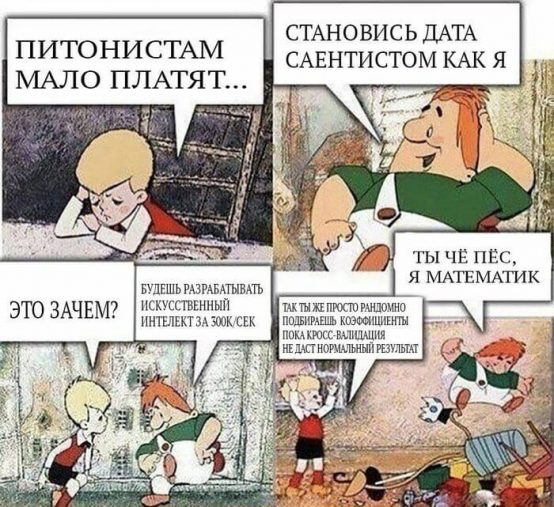

**Задание 4.2**. Напи**щ**ите ниже фидбек по заданию и по курсу в целом. 